### Embedding Quantization

Embeddings may be challenging to scale up, which leads to expensive solutions and high latencies. Currently, many state-of-the-art models produce embeddings with 1024 dimensions, each of which is encoded in float32, i.e., they require 4 bytes per dimension. To perform retrieval over 50 million vectors, you would therefore need around 200GB of memory. This tends to require complex and costly solutions at scale.

In [32]:
!pip install -U sentence-transformers

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [33]:
from sentence_transformers import SentenceTransformer
from sentence_transformers.quantization import quantize_embeddings

In [34]:
# 1. Load an embedding model
model = SentenceTransformer("mixedbread-ai/mxbai-embed-large-v1")

### Binary Quantization

- float32 to binary (0 and 1)
- Reduce memory and storage by 32x
- Hamming distance to compare two binary embeddings
    
    Q: [0, 1, 1, 1, 0, 0]

    s1: [0, 1, 1, 0, 0, 0] \
    s2: [0, 1, 0, 0, 1, 0] \
    s3: [0, 1, 1, 0, 0, 0]

    Lower Hamming Distance means close the binary embeddings.

In [35]:
# 2. encode some text without quantization & apply quantization afterwards
embeddings = model.encode(["I am driving to the lake.", "It is a beautiful day."])
binary_embeddings = quantize_embeddings(embeddings, precision="binary")

In [36]:
print(embeddings.shape)

print(embeddings.nbytes)

print(embeddings.dtype)

print(binary_embeddings.shape)

print(binary_embeddings.nbytes)

print(binary_embeddings.dtype)


(2, 1024)
8192
float32
(2, 128)
256
int8


In [37]:
4 * 1024 * 2

8192

- 1024 bytes into 1024 bit
- 1024 bits / 8 = 128 bytes

### Scalar Quantization

- Float32 to int8
- 1024 * 4 bytes to 1024 * 1 byte
- -128 to 127

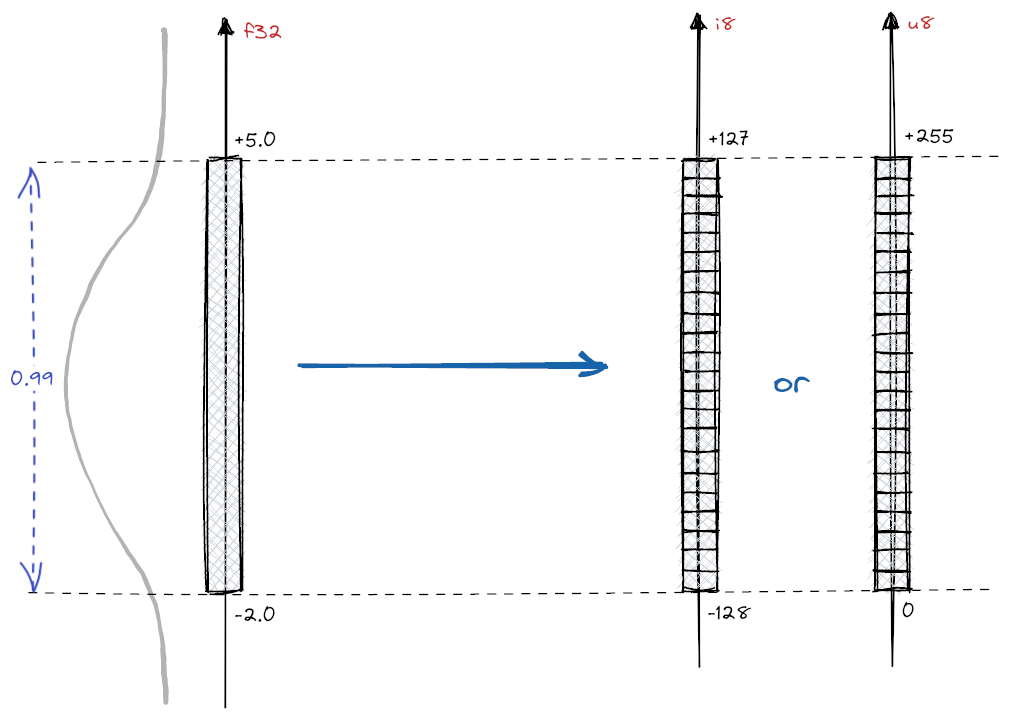

In [38]:
from datasets import load_dataset

# 2. Prepare an example calibration dataset
corpus = load_dataset("nq_open", split="train[:1000]")["question"]
calibration_embeddings = model.encode(corpus)

# 3. Encode some text without quantization & apply quantization afterwards
embeddings = model.encode(["I am driving to the lake.", "It is a beautiful day."])
int8_embeddings = quantize_embeddings(
    embeddings,
    precision="int8",
    calibration_embeddings=calibration_embeddings,
)

In [39]:
print(embeddings.shape)

print(embeddings.nbytes)

print(embeddings.dtype)

print(int8_embeddings.shape)

print(int8_embeddings.nbytes)

print(int8_embeddings.dtype)


(2, 1024)
8192
float32
(2, 1024)
2048
int8


In [40]:
int8_embeddings[0]

array([-26,  10,   4, ...,  -7,  32,  -4], dtype=int8)

### Retrievel Speed

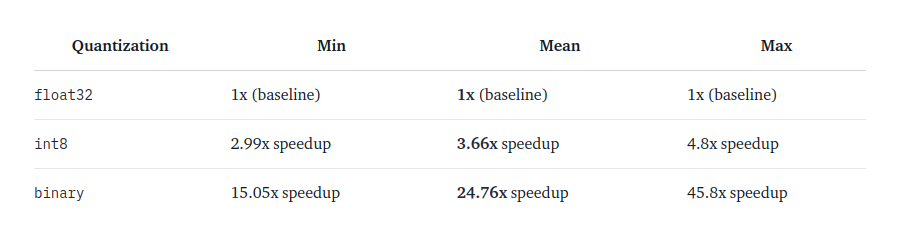

### Performance Speed

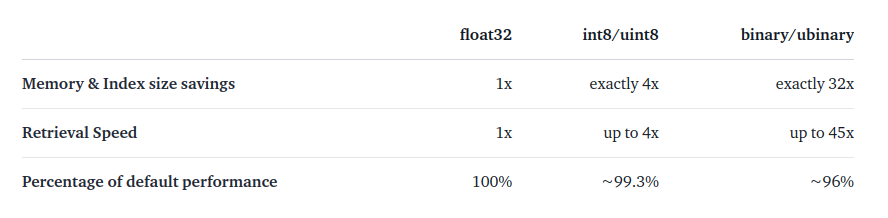